<a href="https://colab.research.google.com/github/Dyuti2005/AIML_Task-3/blob/main/TASK3_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
# Ensure you have uploaded 'Housing.csv' to Colab
df = pd.read_csv('Housing.csv')

# Initial exploration
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:

binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})


df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [3]:
# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Split: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (436, 13)
Testing set: (109, 13)


In [4]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [5]:
# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")

--- Model Evaluation ---
Mean Absolute Error (MAE): 970,043.40
Root Mean Squared Error (RMSE): 1,324,506.96
R-squared (R2) Score: 0.6529


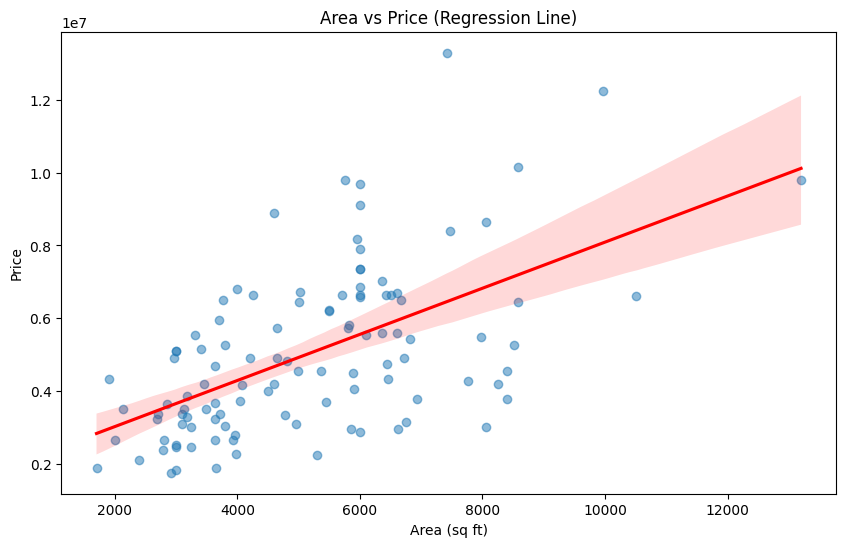

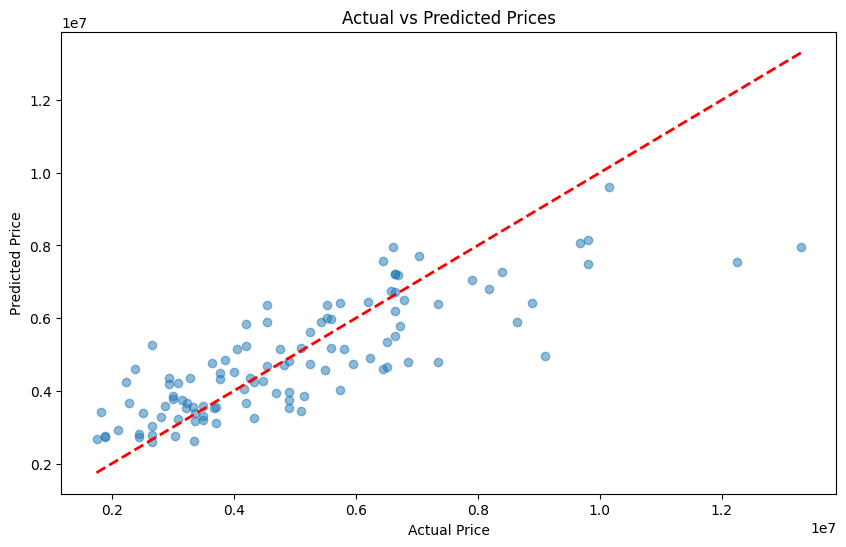

In [6]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test['area'], y=y_test, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Area vs Price (Regression Line)')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.show()

# Residual Plot (Actual vs Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [7]:
# See which features affect price the most
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print("\n--- Feature Coefficients ---")
print(coeff_df)


--- Feature Coefficients ---
                                  Coefficient
bathrooms                        1.094445e+06
airconditioning                  7.914267e+05
hotwaterheating                  6.846499e+05
prefarea                         6.298906e+05
stories                          4.074766e+05
basement                         3.902512e+05
mainroad                         3.679199e+05
guestroom                        2.316100e+05
parking                          2.248419e+05
bedrooms                         7.677870e+04
area                             2.359688e+02
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05
